In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
def read_file(filename, encode = 'UTF-8'):
    """
    Read the text file with the given filename;
    return a list of the words of text in the file; ignore punctuations.
    also returns the longest word length in the file.
    """
    punctuation_set = set(u'''_—＄％＃＆:#$&!),.:;?]}¢'"、。〉》」』】〕〗〞︰︱︳﹐､﹒
    ﹔﹕﹖﹗﹚﹜﹞！），．：；？｜｝︴︶︸︺︼︾﹀﹂﹄﹏､～￠
    々‖•·ˇˉ―--′’”([{£¥'"‵〈《「『【〔〖（［｛￡￥〝︵︷︹︻
    ︽︿﹁﹃﹙﹛﹝（｛“‘-—_…''')
    num = 0
    word_list = []
    with open(filename, "r", encoding = encode) as file:
        for line in file:
            l = line.split()
            for word in l:
                new_word = ''
                ch_list = list(word)
                for c in ch_list:
                    if c not in punctuation_set and not c == "_":
                        new_word = new_word + c
                if not len(new_word) == 0: 
                    word_list.append(word)
                    if len(word) > num:
                        num = len(word)
                    
    print("Read file successfully!")
    return word_list, num
    

In [3]:
def count_frequency(word_list):
    """
    Input: a list containing words or characters
    Return: a dictionary mapping words to frequency.
    """
    D = {}
    for new_word in word_list:
        if new_word in D:
            D[new_word] = D[new_word]+1
        else:
            D[new_word] = 1
    return D

In [4]:
def decide_seq_order(word_list):
    """
    Input: a list containing words or characters
    Return: a dictionary mapping each word to its sequential number, which is decided by the order it 
            first appears in the word_list.
            
            And a list containg non-repetitive words, each in the order it first appears in word_list.
    """
    D = {}
    another_list = []
    for word in word_list:
        if word not in another_list:
            another_list.append(word)
    for num in range(len(another_list)):
        D[another_list[num]] = num + 1
    
    return D, another_list

In [5]:
def transfrom_wordlist_into_charlist(word_list):
    """Divide each words in the word_list into characters, order reserved.
    Input: a list containing words
    Return: a list containg char, 
    """
    char_list = []
    for word in word_list:
        char_list.extend(list(word))
        
    return char_list

In [6]:
def produce_data_frame(word_list, word_freq, word_seq,varibleTitle ):
    word_list = list(set(word_list))
    data = {}
    word_seq_list = []
    word_freq_list = []
    
    for word in word_list:
        word_freq_list.append(word_freq[word])
        word_seq_list.append(word_seq[word])
    
    first = varibleTitle 
    second = varibleTitle + "SeqOrder"
    third = varibleTitle + "Freq"
    forth = varibleTitle + "Rank"
    
    data[first] = word_list
    data[second] = word_seq_list
    data[third] = word_freq_list  
    
    dataFrame = pd.DataFrame(data)
    dataFrame = dataFrame.sort_values([third, second],ascending = [False,True])
    rank = np.array(list(range(1,len(dataFrame)+1))) 
    dataFrame[forth] = rank
    column_list = [first, third, forth, second]
    dataFrame = dataFrame[column_list]
    dataFrame = dataFrame.reset_index(drop=True)
    return dataFrame
            
            

In [7]:
def produce_wordRank_charRank_frame(pd_word,pd_char,longest):
    
    D = {}
    
    char_array = pd_char["char"]
    char_rank = {}
    
    for i in range(len(pd_char)):
        char_rank[char_array[i]] = i + 1 
    
    for i in range(longest):
        D[i] = []
    
    word_array = pd_word["word"]
    
    for word in word_array:
        for i in range(len(word)):
            D[i].append(int(char_rank[word[i]]))
        
        if len(word) < longest:
            for j in range(len(word),longest):
                D[j].append(np.nan)
    
    for k in range(longest):
        feature = str(k) + "th"+"_char_rank"
        pd_word[feature] = np.array(D[k])
    
    return pd_word  

In [8]:
def main(file_name, encode = "UTF-8"):
    l, longest_l = read_file(file_name,encode)
    word_freq = count_frequency(l)
    print("Successfully count word freqency!")
    word_seq, word_list = decide_seq_order(l)
    c_list = transfrom_wordlist_into_charlist(l)
    char_seq, char_list = decide_seq_order(c_list)
    char_freq = count_frequency(c_list)
    print("Successfully count char freqency!")
    pd_word= produce_data_frame(word_list, word_freq, word_seq,"word")
    another_word = pd_word.copy()
    pd_char= produce_data_frame(char_list, char_freq, char_seq,"char")
    data_frame = produce_wordRank_charRank_frame(pd_word,pd_char,longest_l)
    print("Successfully build data frames!")
    return data_frame, pd_char, another_word

In [9]:
def draw(data_frame,feature = ["0th_char_rank","wordFreq"], x_label = "wordRank", y_label = "charRank",  
         title = "fake2Viet3"):
    
    feature1 = feature[0]
    feature2 = feature[1]
    
    zeroth_char_rank = data_frame[feature1]
    word_freq = data_frame[feature2]
    
    plt.figure(1)
    plt.ylabel(feature1)
    plt.xlabel(x_label)
    plt.title(title)
    plt.plot(zeroth_char_rank,'ro')
    
    plt.figure(2)
    plt.ylabel(feature2)
    plt.xlabel(x_label)
    plt.title(title + " log-log")
    plt.yscale('log')
    plt.xscale('log')
    plt.plot(word_freq,'ro')
    
    return None
        
   

In [10]:
def check_const_ratio(data, feature= "wordRank", criteria = "wordFreq",max_range = 200):
    """Calculate the ratios of date in the feature column
    
    Parameters:
    ---
    data: numpy.DataFrame
        a data frame contains information about word stats.
    
    feature: string
        feature to be oberved
    
    max_range: int 
        the maximum lenth of wordRank to be covered
                
        
    
    Returns
    ---
    new: numpy.array
        a numpy array containing rotios of the data satisfying Ming's criteria in the feature column.
    
    """
    np_array = np.array([])
    
    for i in range(1,max_range):
        dd = data[data[criteria] == i]
        if dd.empty: break
        else:
            tmp = np.array(dd.tail(1)[feature])
            np_array = np.append(np_array,tmp)
        
    numer_array = np.append(np_array,[1])
    denom_array = np.append([1],np_array)
    new = numer_array / denom_array
    print(feature, " ratio: ",new[1:-1])
    print("std= ",new[1:-1].std())
    return new

### Analyse Vietnamese fake scripts to see if they are YYY.

NOTE: "fake2char_Viet3" means a 3-character Vietnamese script generated from a fake script with all words having 2 characters, et cetera.

Read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!
wordRank  ratio:  [ 0.46253746  0.5674946   0.67269267  0.76379066  0.78888889  0.8286385
  0.8470255   0.88628763  0.89433962  0.89873418  0.92018779  0.90816327
  0.92696629  0.90909091  0.92        0.94202899  0.96153846  0.944
  0.92372881  0.97247706  0.91509434  0.94845361  0.9673913   0.95505618
  0.96470588  0.93902439  0.94805195  0.95890411  0.98571429  0.98550725
  0.98529412]
std=  0.119920122735


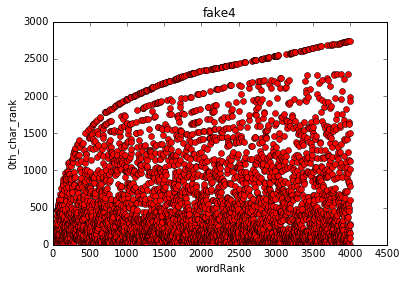

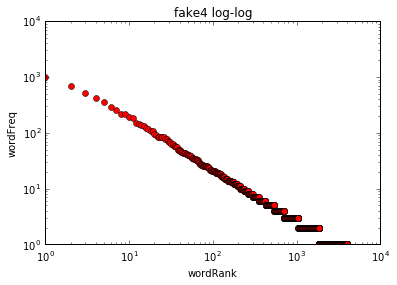

In [20]:
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything goes into trouble, use (1) instead of (2), and vise versa.
filename = "DEC16FAKE4_2.txt" #change filename when you want to get statictical information of another
##text file.
big, char, word = main(filename,encode) 
draw(big,title = "fake4")
arr = check_const_ratio(word,feature= "wordRank", criteria = "wordFreq",max_range = 200)

In [21]:
writer = pd.ExcelWriter('DEC16FAKE4_2.xlsx')
big.to_excel(writer,'Sheet1')
word.to_excel(writer,'Sheet2')
char.to_excel(writer,'Sheet3')
writer.save()

In [13]:
print(big.to_string)

<bound method DataFrame.to_string of       word  wordFreq  wordRank  wordSeqOrder  0th_char_rank  1th_char_rank  \
0     寶直料防      2192         1             2              4              2   
1     能四貝殉      1037         2             1              5              7   
2     用警有澳       667         3            20             10             12   
3     湖樹邱師       514         4            47             18             15   
4     君是力訂       419         5            38             26             20   
5     同生勢始       336         6             6             22             17   
6     流起銷華       293         7            80             30             21   
7     適圓自代       256         8            25             43             39   
8     挫葛度擁       247         9            40             41             46   
9     運複負施       216        10            16             38             57   
10    上女價放       177        11            37             27             59   
11    榮有鞏產       175       

Read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!
wordRank  ratio:  [ 0.44553967  0.57245575  0.66183575  0.77372263  0.8         0.7995283
  0.86725664  0.85714286  0.88095238  0.92792793  0.90776699  0.9197861
  0.9127907   0.92993631  0.93835616  0.95620438  0.89312977  0.95726496
  0.96428571  0.97222222  0.95238095  0.97        0.97938144  0.94736842
  0.96666667  0.95402299  0.95180723  0.94936709  0.97333333  0.98630137
  0.98611111  0.95774648  0.94117647  0.953125    0.98360656  0.93333333]
std=  0.117160497694


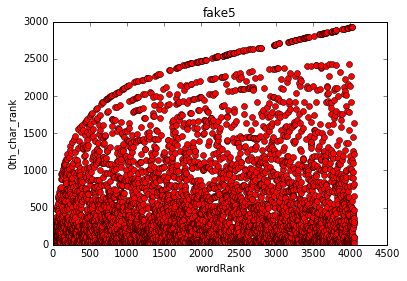

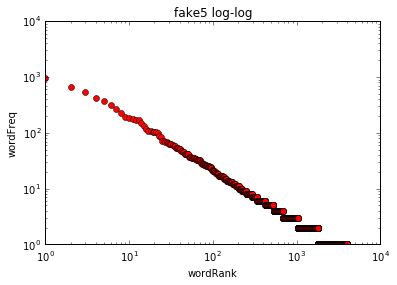

In [22]:
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything goes into trouble, use (1) instead of (2), and vise versa.
filename = "DEC16FAKE5_2.txt" #change filename when you want to get statictical information of another
##text file.
big, char, word = main(filename,encode) 
draw(big,title = "fake5")
arr = check_const_ratio(word,feature= "wordRank", criteria = "wordFreq",max_range = 200)

In [19]:
#print(big.to_string())

In [23]:
writer = pd.ExcelWriter('DEC16FAKE5_2.xlsx')
big.to_excel(writer,'Sheet1')
word.to_excel(writer,'Sheet2')
char.to_excel(writer,'Sheet3')
writer.save()

Read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!
wordRank  ratio:  [ 0.4593362   0.56425814  0.69794721  0.75070028  0.80597015  0.81944444
  0.85028249  0.84053156  0.87747036  0.86936937  0.93264249  0.90555556
  0.95092025  0.92903226  0.94444444  0.95588235  0.95384615  0.9516129
  0.92372881  0.94495413  0.97087379  0.95        0.94736842  0.97777778]
std=  0.128771436787


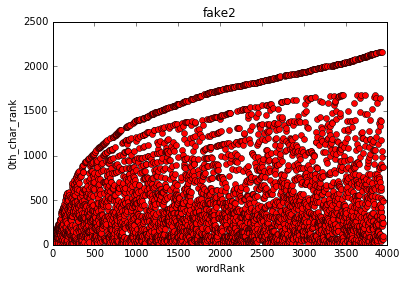

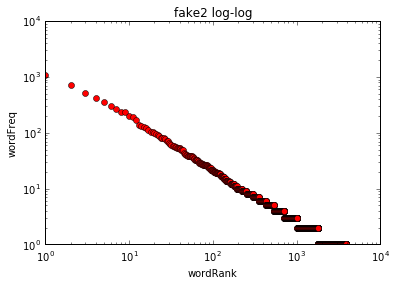

In [24]:
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything goes into trouble, use (1) instead of (2), and vise versa.
filename = "DEC16FAKE2_2.txt" #change filename when you want to get statictical information of another
##text file.
big, char, word = main(filename,encode) 
draw(big,title = "fake2")
arr = check_const_ratio(word,feature= "wordRank", criteria = "wordFreq",max_range = 200)


In [25]:
writer = pd.ExcelWriter('DEC16FAKE2_2.xlsx')
big.to_excel(writer,'Sheet1')
word.to_excel(writer,'Sheet2')
char.to_excel(writer,'Sheet3')
writer.save()

Read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!
wordRank  ratio:  [ 0.46471338  0.57894737  0.66098485  0.74068768  0.7794971   0.82630273
  0.86186186  0.88850174  0.89019608  0.91189427  0.93236715  0.88601036
  0.92397661  0.90506329  0.92307692  0.9469697   0.96        0.91666667
  0.99090909  0.97247706  0.94339623  0.97        0.92783505  0.98888889
  0.96629213  0.94186047  0.96296296  0.97435897  0.93421053  0.98591549
  0.98571429  0.95652174  0.95454545  0.98412698  0.96774194  0.95      ]
std=  0.116200485222


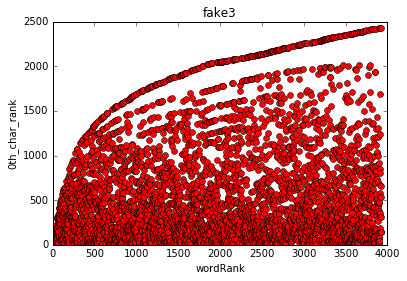

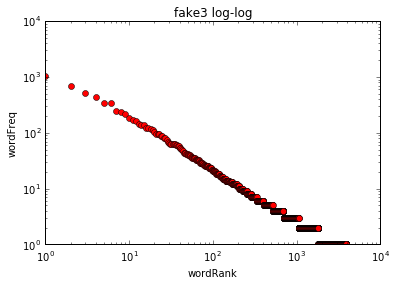

In [26]:
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything goes into trouble, use (1) instead of (2), and vise versa.
filename = "DEC16FAKE3_2.txt" #change filename when you want to get statictical information of another
##text file.
big, char, word = main(filename,encode) 
draw(big,title = "fake3")
arr = check_const_ratio(word,feature= "wordRank", criteria = "wordFreq",max_range = 200)

In [27]:
writer = pd.ExcelWriter('DEC16FAKE3_2.xlsx')
big.to_excel(writer,'Sheet1')
word.to_excel(writer,'Sheet2')
char.to_excel(writer,'Sheet3')
writer.save()